# Taxi Trips 2023

In [1]:
import pyodbc
import sqlalchemy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# get list of existing drivers:
server = 'EDEN'
username = 'EDEN'
password = 'EDEN'
database = 'taxi_trips_2023'
driver = 'ODBC Driver 17 for SQL Server'

connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}&trusted_connection=yes'
engine = sc.create_engine(connection_string)

query = 'SELECT * FROM taxi_trips_2023'
Taxi = pd.read_sql(query, engine)
Taxi.head(1)

,column1,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,...,Trip_Total,Payment_Type,Company,Pickup_Centroid_Latitude,Pickup_Centroid_Longitude,Pickup_Centroid_Location,Dropoff_Centroid_Latitude,Dropoff_Centroid_Longitude,Dropoff_Centroid_Location,customer_rate
0,77193,bf0de2cede389d8c4e377d5a588bd22d1404f51a,92a78c8b1d09e1d7668d08f04825e490957dcdfe6448e5...,01/07/2023 01:00:00 PM,01/07/2023 01:30:00 PM,"1,954",18.08,NaN,1.703132e+10,NaN,...,60.599998,Credit Card,Blue Ribbon Taxi Association,NaN,NaN,None,41.884987,-87.620995,POINT (-87.6209929134 41.8849871918),4.0


-------------------------------------------

In [42]:
# Copy the table so as not to disrupt the database
Taxi_Trip = Taxi.copy()
Taxi_Trip.head(3)

,column1,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,...,Trip_Total,Payment_Type,Company,Pickup_Centroid_Latitude,Pickup_Centroid_Longitude,Pickup_Centroid_Location,Dropoff_Centroid_Latitude,Dropoff_Centroid_Longitude,Dropoff_Centroid_Location,customer_rate
0,77193,bf0de2cede389d8c4e377d5a588bd22d1404f51a,92a78c8b1d09e1d7668d08f04825e490957dcdfe6448e5...,01/07/2023 01:00:00 PM,01/07/2023 01:30:00 PM,"1,954",18.08,NaN,1.703132e+10,NaN,...,60.599998,Credit Card,Blue Ribbon Taxi Association,NaN,NaN,None,41.884987,-87.620995,POINT (-87.6209929134 41.8849871918),4.0
1,77194,be58fb129307afa824ef64a9db34c473f6364924,c3bb697ebd10de692888e34f4f3c1ad35d7d5bc0bccc15...,01/07/2023 01:00:00 PM,01/07/2023 01:00:00 PM,480,1.10,NaN,NaN,32.0,...,8.000000,Cash,"Taxicab Insurance Agency, LLC",41.878864,-87.625191,POINT (-87.6251921424 41.8788655841),41.899601,-87.633308,POINT (-87.6333080367 41.899602111),5.0
2,77195,bf17d1fbf743fe0e14fe3a9272e47bf664b371fa,429921ecfc56b164a2f4edc3531f415194394704ab4aa1...,01/07/2023 01:00:00 PM,01/07/2023 01:00:00 PM,300,0.70,1.703108e+10,1.703108e+10,8.0,...,8.250000,Credit Card,Taxi Affiliation Services,41.892509,-87.626213,POINT (-87.6262149064 41.8925077809),41.895035,-87.619713,POINT (-87.6197106717 41.8950334495),4.0


______________________________________

# Data Preparation & Cleaning

In [43]:
# Understanding the data
inform =Taxi_Trip.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5502739 entries, 0 to 5502738
Data columns (total 25 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   column1                     object 
 1   Trip_ID                     object 
 2   Taxi_ID                     object 
 3   Trip_Start_Timestamp        object 
 4   Trip_End_Timestamp          object 
 5   Trip_Seconds                object 
 6   Trip_Miles                  float64
 7   Pickup_Census_Tract         float64
 8   Dropoff_Census_Tract        float64
 9   Pickup_Community_Area       float64
 10  Dropoff_Community_Area      float64
 11  Fare                        float64
 12  Tips                        float64
 13  Tolls                       float64
 14  Extras                      float64
 15  Trip_Total                  float64
 16  Payment_Type                object 
 17  Company                     object 
 18  Pickup_Centroid_Latitude    float64
 19  Pickup_Centroid_Longi

______________________________________

***Removing Duplicate Records:***


Duplicates can skew the results of an analysis, leading to inaccurate conclusions. By identifying and removing duplicate records, you ensure the uniqueness of each data point, which is vital for the integrity of the analysis.


In [44]:
Taxi_Trip = Taxi_Trip.drop_duplicates()

______________________________________

***Optimizing with Relevant Columns:***


Including irrelevant or unnecessary columns in your dataset can slow down processing times and clutter the analysis with unneeded information. By focusing only on relevant columns, you streamline the dataset, making it more efficient for analysis. This step involves understanding the objectives of your analysis to determine which data is relevant and which isn’t.


In [45]:
# remove irrelevant columns
column_drop=['column1','Pickup_Census_Tract','Dropoff_Census_Tract',
             'Pickup_Centroid_Latitude','Pickup_Centroid_Longitude','Pickup_Centroid_Location',
             'Dropoff_Centroid_Latitude','Dropoff_Centroid_Longitude','Dropoff_Centroid_Location']
Taxi_Trip=Taxi_Trip.drop(columns=column_drop)
print([Taxi_Trip.columns])

[Index(['Trip_ID', 'Taxi_ID', 'Trip_Start_Timestamp', 'Trip_End_Timestamp',
       'Trip_Seconds', 'Trip_Miles', 'Pickup_Community_Area',
       'Dropoff_Community_Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip_Total', 'Payment_Type', 'Company', 'customer_rate'],
      dtype='object')]


______________________________________

***Converting Data Types:***

Different data types require different analytical approaches. For instance, dates might need to be converted to a standard format to facilitate time series analysis, and decimal numbers must be accurate for precise calculations. Correctly identifying and converting these data types makes the data more usable and meaningful for analysis.


In [46]:
# Change data type to columns
columns_to_fix=['Trip_Miles', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip_Total','Trip_Seconds']
for c in columns_to_fix:
    print(f'___ {c} ___', end="")
    try:
        Taxi_Trip[c] = Taxi_Trip[c].astype(float)
    except:
        Taxi_Trip[c] = Taxi_Trip[c].str.replace(',','').astype(float)
    print(Taxi_Trip[c].dtypes)

___ Trip_Miles ___float64
___ Fare ___float64
___ Tips ___float64
___ Tolls ___float64
___ Extras ___float64
___ Trip_Total ___float64
___ Trip_Seconds ___float64


In [47]:
# Correcting the format of the date columns
format1 ="%d-%m-%Y %H:%M:%S"
Taxi_Trip['Trip_Start_Timestamp']=pd.to_datetime(Taxi_Trip['Trip_Start_Timestamp']).dt.strftime(format1).astype('datetime64[ns]')
Taxi_Trip['Trip_End_Timestamp']=pd.to_datetime(Taxi_Trip['Trip_End_Timestamp']).dt.strftime(format1).astype('datetime64[ns]')
Taxi_Trip.head()

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Community_Area,Dropoff_Community_Area,Fare,Tips,Tolls,Extras,Trip_Total,Payment_Type,Company,customer_rate
0,bf0de2cede389d8c4e377d5a588bd22d1404f51a,92a78c8b1d09e1d7668d08f04825e490957dcdfe6448e5...,2023-07-01 13:00:00,2023-07-01 13:30:00,1954.0,18.08,NaN,32.0,45.00,10.1,0.0,5.0,60.599998,Credit Card,Blue Ribbon Taxi Association,4.0
1,be58fb129307afa824ef64a9db34c473f6364924,c3bb697ebd10de692888e34f4f3c1ad35d7d5bc0bccc15...,2023-07-01 13:00:00,2023-07-01 13:00:00,480.0,1.10,32.0,8.0,7.00,0.0,0.0,1.0,8.000000,Cash,"Taxicab Insurance Agency, LLC",5.0
2,bf17d1fbf743fe0e14fe3a9272e47bf664b371fa,429921ecfc56b164a2f4edc3531f415194394704ab4aa1...,2023-07-01 13:00:00,2023-07-01 13:00:00,300.0,0.70,8.0,8.0,5.25,2.0,0.0,1.0,8.250000,Credit Card,Taxi Affiliation Services,4.0
3,c43d3e5cdf2dfb88fbe9168616c8b5df12e8e9c9,121e6b6064d993f2f1bc475ffd6392987c431f18e99c30...,2023-07-01 13:00:00,2023-07-01 13:45:00,2460.0,6.20,77.0,6.0,24.75,0.0,0.0,0.0,24.750000,Unknown,Top Cab Affiliation,1.0
4,c1d9e5fb42c97ace192a799ff652995d53d309c5,70bf7d4596f2cb1e28077895f272ce60c503eeeaa98208...,2023-07-01 13:00:00,2023-07-01 13:30:00,2054.0,18.40,4.0,42.0,46.25,0.0,0.0,0.0,46.250000,Cash,Flash Cab,4.0


In [48]:
# Correcting the PK column
Taxi_Trip['Trip_ID']=(Taxi_Trip.index+1).astype('str')

In [49]:
# seconds to hours
Taxi_Trip.insert(Taxi_Trip.columns.get_loc('Trip_Seconds')+1,'Trip_Hours',round(Taxi_Trip['Trip_Seconds']/3600,2))

Check the data type of each column


In [50]:
inform =Taxi_Trip.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5502739 entries, 0 to 5502738
Data columns (total 17 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Trip_ID                 object        
 1   Taxi_ID                 object        
 2   Trip_Start_Timestamp    datetime64[ns]
 3   Trip_End_Timestamp      datetime64[ns]
 4   Trip_Seconds            float64       
 5   Trip_Hours              float64       
 6   Trip_Miles              float64       
 7   Pickup_Community_Area   float64       
 8   Dropoff_Community_Area  float64       
 9   Fare                    float64       
 10  Tips                    float64       
 11  Tolls                   float64       
 12  Extras                  float64       
 13  Trip_Total              float64       
 14  Payment_Type            object        
 15  Company                 object        
 16  customer_rate           float64       
dtypes: datetime64[ns](2), float64(11), object(4)
m

--------------------------

## Cleaning Data from records missing values

### Clearing records with missing values in data before analysis is important for several reasons:

- **Accuracy of Analysis** - Empty records can lead to inaccurate calculations and analysis. By addressing these empty records, you ensure more accurate results.
- **Quality of Data** - The presence of empty records often indicates issues with data quality. Removing or treating these empty entries helps in maintaining the overall quality of the dataset.
- **Consistency in Data** - Consistency is key in data analysis. Cleaning these records ensures uniformity across the dataset.
- **Decision Making** - Empty records can lead to gaps in information, which in turn can result in poor or uninformed decisions.
- **Visualization Clarity** - Cleaning the data ensures that visualizations accurately represent the underlying data.
- **Compliance with Analytical Methods** - Some analytical methods require complete data sets to function correctly. 
- **Efficiency in Processing** - Cleaning the data can speed up processing times.

In [51]:
def mean_highlighter(x):
    style_gt= "background-color: red; color: white; font-weight: bold;"
    style_lt  = "background-color: green; color: white; font-weight: bold;"
    gt_mean = x > 0
    return [style_gt if i else style_lt for i in gt_mean]

In [52]:
# examining missing values
print("Missing values distribution: ")
Missing_values_distribution = pd.DataFrame(Taxi_Trip.isnull().mean())
Missing_values_distribution.style.apply(mean_highlighter)

Missing values distribution: 


,0
Trip_ID,0.000000
Taxi_ID,0.000028
Trip_Start_Timestamp,0.000000
Trip_End_Timestamp,0.000011
Trip_Seconds,0.000193
Trip_Hours,0.000193
Trip_Miles,0.000003
Pickup_Community_Area,0.039223
Dropoff_Community_Area,0.096470
Fare,0.001771


In [53]:
#Setting up new columns - did the trip begin in Chicago Did the trip end in Chicago?
Taxi_Trip.insert(Taxi_Trip.columns.get_loc('Pickup_Community_Area')+1,'Pickup_in_Chicago',Taxi_Trip['Pickup_Community_Area'].notna().astype(int))
Taxi_Trip.insert(Taxi_Trip.columns.get_loc('Dropoff_Community_Area')+1 ,'Dropoff_in_Chicago',Taxi_Trip['Dropoff_Community_Area'].notna().astype(int) )

# Pickup Community Area: The Community Area where the trip began. This column will be blank for locations outside Chicago.
# Dropoff Community Area: The Community Area where the trip ended. This column will be blank for locations outside Chicago. 
# NULL = 0
Taxi_Trip['Pickup_Community_Area']=Taxi_Trip['Pickup_Community_Area'].fillna(0)
Taxi_Trip['Dropoff_Community_Area']=Taxi_Trip['Dropoff_Community_Area'].fillna(0)


In [54]:
Taxi_Trip_Cleaning = Taxi_Trip.copy()
# Data Cleaning:
filtered_df = Taxi_Trip[(    Taxi_Trip['Taxi_ID'].isnull() |
                             Taxi_Trip['Trip_End_Timestamp'].isnull() |
                             Taxi_Trip['Trip_Miles'].isnull() |
                             Taxi_Trip['Trip_Seconds'].isnull() |
                             Taxi_Trip['Fare'].isnull() |
                             Taxi_Trip['Tips'].isnull() |
                             Taxi_Trip['Tolls'].isnull() |
                             Taxi_Trip['Extras'].isnull() |
                             Taxi_Trip['Trip_Total'].isnull())]
Taxi_Trip_Cleaning = Taxi_Trip_Cleaning.drop(filtered_df.index)

# examining missing values
print("Missing values distribution: ")
Missing_values_distribution = pd.DataFrame(Taxi_Trip_Cleaning.isnull().mean())
Missing_values_distribution.style.apply(mean_highlighter)

Missing values distribution: 


,0
Trip_ID,0.000000
Taxi_ID,0.000000
Trip_Start_Timestamp,0.000000
Trip_End_Timestamp,0.000000
Trip_Seconds,0.000000
Trip_Hours,0.000000
Trip_Miles,0.000000
Pickup_Community_Area,0.000000
Pickup_in_Chicago,0.000000
Dropoff_Community_Area,0.000000


-----------------------------------------------

## Enhancing Data Quality and Precision



**Anomaly Detection and Data Coherence**


Checking for the amount of inconsistent data is key to determine the quality of the dataset and to ensure the validity of the posterior analysis. One major inconsistency was detected in one of the KPIs. This inconsistency was detected when checking if total_trip was equal to the sum of fare + tips + tolls + extras.

In [55]:
Taxi_Trip_Cleaning['difference']= round(Taxi_Trip_Cleaning['Trip_Total']-(Taxi_Trip_Cleaning['Fare']+Taxi_Trip_Cleaning['Tips']+Taxi_Trip_Cleaning['Tolls']+Taxi_Trip_Cleaning['Extras']),1)
result_df = Taxi_Trip_Cleaning.groupby('difference').size().reset_index(name='records')
result_df.sort_values(by='difference')

,difference,records
0,0.0,3741158
1,0.2,1
2,0.5,1726746
3,0.6,9
4,1.0,2520
5,1.2,1
6,1.5,154
7,1.9,151
8,2.0,158
9,2.4,7


In [56]:
Taxi_Trip_Cleaning['status'] = np.where((Taxi_Trip_Cleaning['difference'] > 1) | (Taxi_Trip_Cleaning['difference'] < -1), 'To be dropped', 'correct')
result_df = Taxi_Trip_Cleaning.groupby('status').size().reset_index(name='records')
result_df.sort_values(by='records')

,status,records
0,To be dropped,21532
1,correct,5470434


**Temporal Data Validation for Trip Records:**


We conducted a thorough verification of travel times, ensuring the logical consistency of our dataset. It is imperative that each trip's start time precedes or coincides with its end time.

In [57]:
result_df = Taxi_Trip_Cleaning.groupby(Taxi_Trip_Cleaning['Trip_Start_Timestamp'] > Taxi_Trip_Cleaning['Trip_End_Timestamp']).size().reset_index(name='count')
result_df 

,index,count
0,False,5489410
1,True,2556


**Checking the payment method in data cleaning**

In [58]:
Taxi_Trip_Cleaning.groupby('Payment_Type').agg(count_Payment_type =('Payment_Type','count'))

,count_Payment_type
Payment_Type,
Cash,1633874
Credit Card,2253802
Dispute,1598
Mobile,820591
No Charge,2299
Prcard,537046
Unknown,242756


**Checking trips that takes place outside of Chicago**

In [59]:
result_df = Taxi_Trip_Cleaning.groupby(Taxi_Trip_Cleaning['Pickup_in_Chicago'] + Taxi_Trip_Cleaning['Dropoff_in_Chicago'] == 0 ).size().reset_index(name='count')
result_df

,index,count
0,False,5360442
1,True,131524


###  Cleaning unreliable data

In [60]:
Taxi_Trip_Cleaning=Taxi_Trip_Cleaning[Taxi_Trip_Cleaning['status'] == 'correct']
Taxi_Trip_Cleaning = Taxi_Trip_Cleaning[Taxi_Trip_Cleaning['Trip_Start_Timestamp'] <= Taxi_Trip_Cleaning['Trip_End_Timestamp']]
Taxi_Trip_Cleaning=Taxi_Trip_Cleaning[Taxi_Trip_Cleaning['Payment_Type'] != 'Unknown']
Taxi_Trip_Cleaning=Taxi_Trip_Cleaning[Taxi_Trip_Cleaning['Pickup_in_Chicago'] + Taxi_Trip_Cleaning['Dropoff_in_Chicago'] > 0]
Taxi_Trip_Cleaning

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Hours,Trip_Miles,Pickup_Community_Area,Pickup_in_Chicago,Dropoff_Community_Area,...,Fare,Tips,Tolls,Extras,Trip_Total,Payment_Type,Company,customer_rate,difference,status
0,1,92a78c8b1d09e1d7668d08f04825e490957dcdfe6448e5...,2023-07-01 13:00:00,2023-07-01 13:30:00,1954.0,0.54,18.080000,0.0,0,32.0,...,45.00,10.1,0.0,5.0,60.599998,Credit Card,Blue Ribbon Taxi Association,4.0,0.5,correct
1,2,c3bb697ebd10de692888e34f4f3c1ad35d7d5bc0bccc15...,2023-07-01 13:00:00,2023-07-01 13:00:00,480.0,0.13,1.100000,32.0,1,8.0,...,7.00,0.0,0.0,1.0,8.000000,Cash,"Taxicab Insurance Agency, LLC",5.0,0.0,correct
2,3,429921ecfc56b164a2f4edc3531f415194394704ab4aa1...,2023-07-01 13:00:00,2023-07-01 13:00:00,300.0,0.08,0.700000,8.0,1,8.0,...,5.25,2.0,0.0,1.0,8.250000,Credit Card,Taxi Affiliation Services,4.0,0.0,correct
4,5,70bf7d4596f2cb1e28077895f272ce60c503eeeaa98208...,2023-07-01 13:00:00,2023-07-01 13:30:00,2054.0,0.57,18.400000,4.0,1,42.0,...,46.25,0.0,0.0,0.0,46.250000,Cash,Flash Cab,4.0,0.0,correct
5,6,ecbd0442d6b871f22f17122917c37190e9aaf098687b39...,2023-07-01 13:00:00,2023-07-01 13:15:00,574.0,0.16,1.610000,32.0,1,8.0,...,8.00,1.0,0.0,0.0,9.500000,Mobile,Blue Ribbon Taxi Association,1.0,0.5,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5502733,5502734,f07a57e895784bd00e38847f25ebf6c1964e28f0e83cc3...,2023-10-31 15:15:00,2023-10-31 15:15:00,264.0,0.07,0.620000,8.0,1,8.0,...,5.25,0.0,0.0,0.0,5.250000,Cash,Medallion Leasin,5.0,0.0,correct
5502735,5502736,7494c64f3245e17ed415a83439f00eba37b78dbf7ddd73...,2023-10-31 15:15:00,2023-10-31 16:30:00,3900.0,1.08,16.200001,32.0,1,0.0,...,43.75,0.0,0.0,7.5,51.250000,Cash,Globe Taxi,4.0,0.0,correct
5502736,5502737,d6e1a9e103336c396201abe9ceb00795fcd41e14ccbf54...,2023-10-31 15:15:00,2023-10-31 15:15:00,473.0,0.13,1.420000,28.0,1,32.0,...,7.50,1.0,0.0,0.0,9.000000,Credit Card,Flash Cab,4.0,0.5,correct
5502737,5502738,cff368b7deb69cd7eb7fb29b1e1cc0a0f03ff0013533a4...,2023-10-31 15:15:00,2023-10-31 15:45:00,1680.0,0.47,0.900000,76.0,1,7.0,...,38.50,10.0,0.0,5.0,53.500000,Credit Card,Taxi Affiliation Services,4.0,0.0,correct


--------------------------

## Enhanced Data Integrity through Outlier Exclusion Visualized

We employed statistical measures to gain deeper insights into critical Key Performance Indicators (KPIs), including:
- Trip Revenue
- Trip Distance
- Trip Duration

The calculation of relevant statistical metrics aimed to enhance our understanding of these pivotal KPIs.


In [61]:
kpis = ['Distance', 'Duration', 'Revenue']
columns = {'Distance': 'Trip_Miles', 'Duration': 'Trip_Seconds', 'Revenue': 'Trip_Total'}
summary_stats_dfs = {}

for kpi in kpis:
    column_name = columns[kpi]
    stats = {
        'KPI': kpi,
        'min': Taxi_Trip_Cleaning[column_name].min(),
        'max': Taxi_Trip_Cleaning[column_name].max(),
        'average': round(Taxi_Trip_Cleaning[column_name].mean(), 2),
        'std': round(Taxi_Trip_Cleaning[column_name].std(), 2),
        'median': Taxi_Trip_Cleaning[column_name].median()
    }
    summary_stats_dfs[kpi] = pd.DataFrame([stats])

summary_stats_df = pd.concat(summary_stats_dfs.values(), ignore_index=True)
summary_stats_df

,KPI,min,max,average,std,median
0,Distance,0.0,921.099976,6.62,7.62,2.91
1,Duration,0.0,86382.000000,1248.24,1702.53,911.00
2,Revenue,0.0,6712.520020,27.72,24.76,17.75


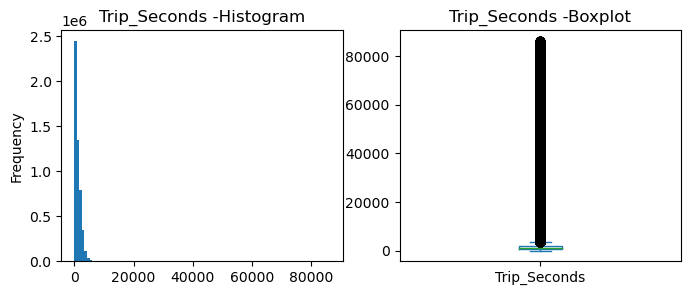

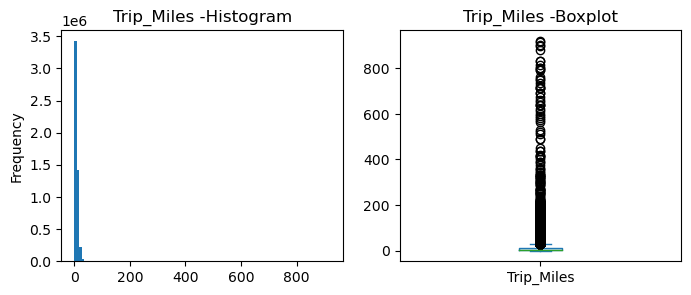

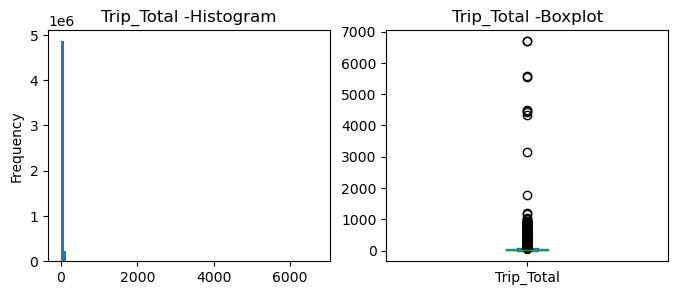

In [62]:
target = 'Trip_Total'
categ_cols = [ 'Pickup_Community_Area', 'Dropoff_Community_Area', 'Payment_Type']
num_cols = ['Trip_Seconds', 'Trip_Miles']    
for i in num_cols + [target]:
    _, ax = plt.subplots(1, 2, figsize=(8, 3))
    Taxi_Trip_Cleaning[i].plot(kind="hist", bins=100, ax=ax[0])
    ax[0].set_title(str(i) + " -Histogram")
    Taxi_Trip_Cleaning[i].plot(kind="box", ax=ax[1])
    ax[1].set_title(str(i) + " -Boxplot")
    plt.show()

The strategic exclusion of outliers from our dataset was significantly facilitated by the utilization of graphical representations. These visual aids were instrumental in identifying and subsequently removing data points that could potentially distort our analytical conclusions.

In our pursuit of data excellence, we executed a series of rigorous data cleansing operations:
- Rows with unidentified payment types were systematically eliminated.
- Trips that originated and terminated outside the designated Chicago area were filtered out.
- Entries indicating Trip Revenues less than 0 or in excess of 100 were expunged.
- We refined our dataset by excluding Trip Durations shorter than 300 seconds or longer than 4500 seconds.
- Records were cleansed of instances where the Trip Distance was registered at 0 miles or exceeded 28 miles.


In [63]:
Taxi_Trip_Cleaning2 =Taxi_Trip_Cleaning.copy()
Taxi_Trip_Cleaning2=Taxi_Trip_Cleaning2[Taxi_Trip_Cleaning2['Trip_Total']<=100]
Taxi_Trip_Cleaning2=Taxi_Trip_Cleaning2[Taxi_Trip_Cleaning2['Trip_Total']>=3]

Taxi_Trip_Cleaning2=Taxi_Trip_Cleaning2[Taxi_Trip_Cleaning2['Trip_Miles']<=28]
Taxi_Trip_Cleaning2=Taxi_Trip_Cleaning2[Taxi_Trip_Cleaning2['Trip_Miles']>0]

Taxi_Trip_Cleaning2=Taxi_Trip_Cleaning2[Taxi_Trip_Cleaning2['Trip_Seconds']>=300]
Taxi_Trip_Cleaning2=Taxi_Trip_Cleaning2[Taxi_Trip_Cleaning2['Trip_Seconds']<=4500]
Taxi_Trip_Cleaning2

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Hours,Trip_Miles,Pickup_Community_Area,Pickup_in_Chicago,Dropoff_Community_Area,...,Fare,Tips,Tolls,Extras,Trip_Total,Payment_Type,Company,customer_rate,difference,status
0,1,92a78c8b1d09e1d7668d08f04825e490957dcdfe6448e5...,2023-07-01 13:00:00,2023-07-01 13:30:00,1954.0,0.54,18.080000,0.0,0,32.0,...,45.00,10.1,0.0,5.0,60.599998,Credit Card,Blue Ribbon Taxi Association,4.0,0.5,correct
1,2,c3bb697ebd10de692888e34f4f3c1ad35d7d5bc0bccc15...,2023-07-01 13:00:00,2023-07-01 13:00:00,480.0,0.13,1.100000,32.0,1,8.0,...,7.00,0.0,0.0,1.0,8.000000,Cash,"Taxicab Insurance Agency, LLC",5.0,0.0,correct
2,3,429921ecfc56b164a2f4edc3531f415194394704ab4aa1...,2023-07-01 13:00:00,2023-07-01 13:00:00,300.0,0.08,0.700000,8.0,1,8.0,...,5.25,2.0,0.0,1.0,8.250000,Credit Card,Taxi Affiliation Services,4.0,0.0,correct
4,5,70bf7d4596f2cb1e28077895f272ce60c503eeeaa98208...,2023-07-01 13:00:00,2023-07-01 13:30:00,2054.0,0.57,18.400000,4.0,1,42.0,...,46.25,0.0,0.0,0.0,46.250000,Cash,Flash Cab,4.0,0.0,correct
5,6,ecbd0442d6b871f22f17122917c37190e9aaf098687b39...,2023-07-01 13:00:00,2023-07-01 13:15:00,574.0,0.16,1.610000,32.0,1,8.0,...,8.00,1.0,0.0,0.0,9.500000,Mobile,Blue Ribbon Taxi Association,1.0,0.5,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5502732,5502733,1b84d02f4f9b66792e2b5fb36d19ec7f5a4eb96f26ed6c...,2023-10-31 15:15:00,2023-10-31 15:30:00,1079.0,0.30,3.670000,28.0,1,37.0,...,13.25,0.0,0.0,0.0,13.250000,Cash,City Service,5.0,0.0,correct
5502735,5502736,7494c64f3245e17ed415a83439f00eba37b78dbf7ddd73...,2023-10-31 15:15:00,2023-10-31 16:30:00,3900.0,1.08,16.200001,32.0,1,0.0,...,43.75,0.0,0.0,7.5,51.250000,Cash,Globe Taxi,4.0,0.0,correct
5502736,5502737,d6e1a9e103336c396201abe9ceb00795fcd41e14ccbf54...,2023-10-31 15:15:00,2023-10-31 15:15:00,473.0,0.13,1.420000,28.0,1,32.0,...,7.50,1.0,0.0,0.0,9.000000,Credit Card,Flash Cab,4.0,0.5,correct
5502737,5502738,cff368b7deb69cd7eb7fb29b1e1cc0a0f03ff0013533a4...,2023-10-31 15:15:00,2023-10-31 15:45:00,1680.0,0.47,0.900000,76.0,1,7.0,...,38.50,10.0,0.0,5.0,53.500000,Credit Card,Taxi Affiliation Services,4.0,0.0,correct


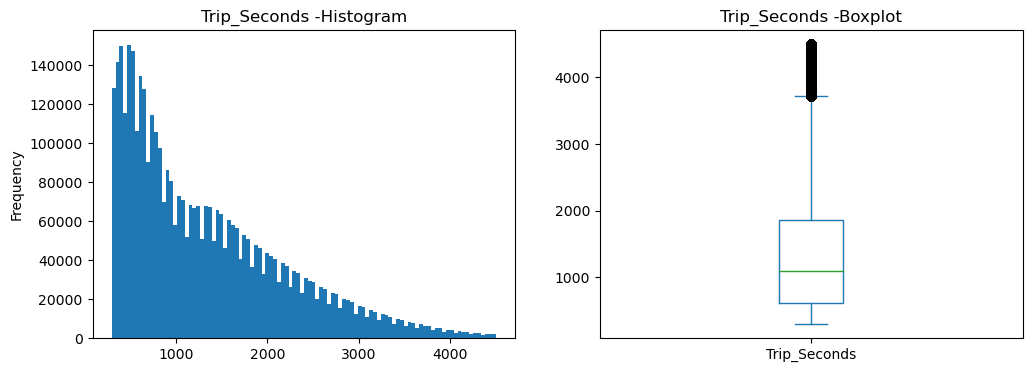

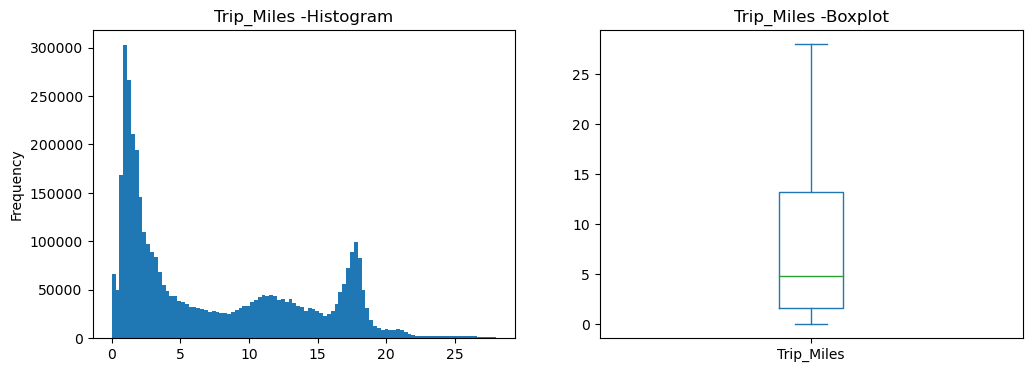

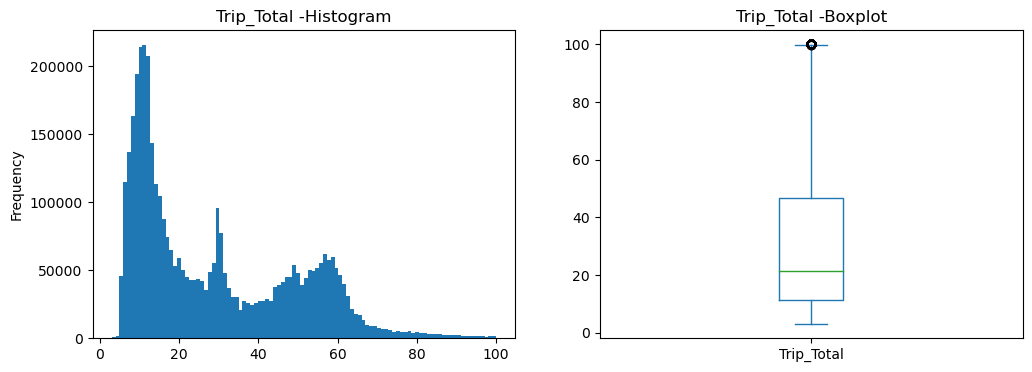

In [64]:
target = 'Trip_Total'
categ_cols = [ 'Pickup_Community_Area', 'Dropoff_Community_Area', 'Payment_Type']
num_cols = ['Trip_Seconds', 'Trip_Miles']    
for i in num_cols + [target]:
    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    Taxi_Trip_Cleaning2[i].plot(kind="hist", bins=100, ax=ax[0])
    ax[0].set_title(str(i) + " -Histogram")
    Taxi_Trip_Cleaning2[i].plot(kind="box", ax=ax[1])
    ax[1].set_title(str(i) + " -Boxplot")
    plt.show()

## Validation of Data Reliability through Correlation Analysis

By carefully assessing the correlation in both states, we verified that the data is now more reliable and exhibits a strengthened interdependence between key variables. This validation underscores the success of our meticulous data cleaning and enhancement procedures in refining the dataset for more accurate analyses and informed decision-making.


In [65]:
kpis = ['Distance', 'Duration', 'Revenue']
columns = {'Distance': 'Trip_Miles', 'Duration': 'Trip_Seconds', 'Revenue': 'Trip_Total'}

correlations_dfs = {}
for kpi in kpis:
    column_name = columns[kpi]
    correlations_data = {
        'variable': kpi,
        'Distance': round(Taxi_Trip_Cleaning[[column_name, 'Trip_Miles']].corr().iloc[0, 1], 2),
        'Duration': round(Taxi_Trip_Cleaning[[column_name, 'Trip_Seconds']].corr().iloc[0, 1], 2),
        'Revenue': round(Taxi_Trip_Cleaning[[column_name, 'Trip_Total']].corr().iloc[0, 1], 2)
    }  
    correlations_dfs[kpi] = pd.DataFrame([correlations_data])
correlations_df = pd.concat(correlations_dfs.values(), ignore_index=True)

print('Table Before Data Refinement: \nUnprocessed Dataset Overview')
display(correlations_df)

correlations_dfs = {}
for kpi in kpis:
    column_name = columns[kpi]
    
    correlations_data = {
        'variable': kpi,
        'Distance': round(Taxi_Trip_Cleaning2[[column_name, 'Trip_Miles']].corr().iloc[0, 1], 2),
        'Duration': round(Taxi_Trip_Cleaning2[[column_name, 'Trip_Seconds']].corr().iloc[0, 1], 2),
        'Revenue': round(Taxi_Trip_Cleaning2[[column_name, 'Trip_Total']].corr().iloc[0, 1], 2)
    }
    correlations_dfs[kpi] = pd.DataFrame([correlations_data])
correlations_df = pd.concat(correlations_dfs.values(), ignore_index=True)


print('Table After Data Refinement: \nEnhanced and Validated Dataset Summary')
correlations_df


Table Before Data Refinement: 
Unprocessed Dataset Overview


,variable,Distance,Duration,Revenue
0,Distance,1.00,0.42,0.75
1,Duration,0.42,1.00,0.41
2,Revenue,0.75,0.41,1.00


Table After Data Refinement: 
Enhanced and Validated Dataset Summary


,variable,Distance,Duration,Revenue
0,Distance,1.00,0.73,0.89
1,Duration,0.73,1.00,0.76
2,Revenue,0.89,0.76,1.00


In [ ]:
Taxi_Trip_Cleaning2.to_sql('Taxi_Trip_SQL', engine, if_exists='replace')
